In [7]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")



# Data Fields

---



    Survival - Survival. 0 = No, 1 = Yes
    Pclass - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
    Sex - Sex(male or female)
    Age - Age in years.
    SibSp - # of siblings / spouses aboard the Titanic.
    Parch - # of parents / children aboard the Titanic.
    Ticket - Ticket number.
    Fare - Passenger fare.
    Cabin - Cabin number.
    Embarked - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton



In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#data analysis libraries
import numpy as np
import pandas as pd
import math
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
# Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
datatest=pd.read_csv('/content/drive/MyDrive/test.csv')
datatrain=pd.read_csv('/content/drive/MyDrive/train.csv')
combine = [datatest, datatrain]

# ***`Data preparation at datatrain`***

In [11]:
datatrain.head()  # preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin , Age and Embarked features contain a number of null values

In [13]:
datatrain.describe() #Numerical data describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Around 38% of the passengers survived
- Most of the passengers are young (29 years )
- 52% of the passengers had siblings
- 38% of the passengers had parents and children

In [14]:
datatrain.describe(include=['O']) # categorical data describe

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
datatrain.drop(columns = ['Ticket','Cabin','Name','PassengerId','Fare'], inplace=True)

In [16]:
datatrain.info() #show after drop 5 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [17]:
datatrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [18]:
total_cells = np.product(datatrain.shape) # Compute total number of cells in dataframe and cells with missing values
total_missing = datatrain.isnull().sum().sum()
percentage_missing = total_missing / total_cells * 100
print(percentage_missing)  

2.8699695366362032


2.869% from training data is missing

In [19]:
datatrain['Sex'] = datatrain['Sex'].map( {'female': 1, 'male': 0} ).astype(int) # maping for sex 

In [20]:
datatrain['Age'] = datatrain.groupby('Pclass'and'Sex')['Age'].transform(lambda x : x.fillna(x.mean())) #Age Missing Data Imputation 
datatrain['Age'] = datatrain['Age'].astype(int) # convert age type into integer 

In [21]:
datatrain['Agerange'] = pd.cut(datatrain['Age'], 5)  # make age as (5) range 
datatrain[['Agerange', 'Survived']].groupby(['Agerange'], as_index=False).mean().sort_values(by='Agerange', ascending=True)

,Agerange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [22]:
for datatrain in combine:    # maping for all age depended on range [0:4]
    datatrain.loc[ datatrain['Age'] <= 16, 'Age'] = 0
    datatrain.loc[(datatrain['Age'] > 16) & (datatrain['Age'] <= 32), 'Age'] = 1
    datatrain.loc[(datatrain['Age'] > 32) & (datatrain['Age'] <= 48), 'Age'] = 2
    datatrain.loc[(datatrain['Age'] > 48) & (datatrain['Age'] <= 64), 'Age'] = 3
    datatrain.loc[ datatrain['Age'] > 64, 'Age'] = 4

In [23]:
datatrain.drop(columns = ['Agerange'], inplace=True) # drop Agerang column

In [24]:
datatrain['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
port = datatrain.Embarked.dropna().mode()[0]
print(port) 
datatrain['Embarked'] = datatrain['Embarked'].fillna(port)

S


In [26]:
datatrain['Embarked'] = datatrain['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [27]:
datatrain.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0
5,0,3,0,1,0,0,2
6,0,1,0,3,0,0,0
7,0,3,0,0,3,1,0
8,1,3,1,1,0,2,0
9,1,2,1,0,1,0,1


# **`Data Visulalization`**

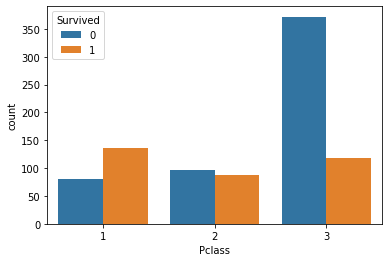

In [28]:
# survied Vs pclass
sns.countplot(x='Pclass',hue='Survived',data=datatrain)

In [29]:
# survied Vs gender
px.pie(datatrain,values='Survived',names='Sex')

where :-       ( '0' is male & '1' is female )

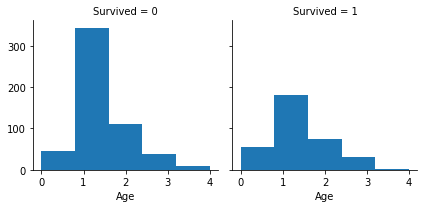

In [30]:
g=sns.FacetGrid(datatrain, col='Survived')
g.map(plt.hist, 'Age', bins=5)

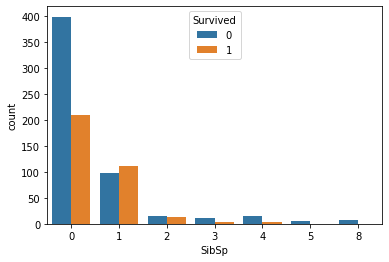

In [31]:
sns.countplot(x='SibSp',hue='Survived',data=datatrain)

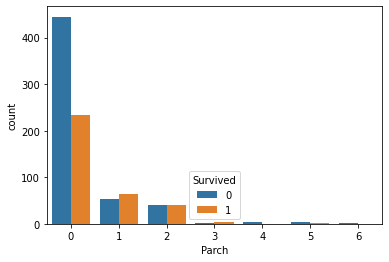

In [32]:
sns.countplot(x='Parch',hue='Survived',data=datatrain)

# ***`Data preparation at datatest`***

In [33]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,S


In [34]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age ,fare and cabin features contain a number of null values

In [35]:
datatest.drop(columns = ['Ticket','Cabin','Name','PassengerId','Fare'], inplace=True)

In [36]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [37]:
#datatest['Encoded Sex'] = datatest['Sex'].map({'male':1, 'female':0})
datatest['Sex'] = datatest['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [38]:
datatest['Age'] = datatest.groupby('Pclass'and'Sex')['Age'].transform(lambda x : x.fillna(x.mean()))
datatest['Age'] = datatest['Age'].astype(int)


In [39]:
datatest['Embarked'] = datatest['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )


In [40]:
datatest.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,2,0,0,2
1,3,1,2,1,0,0
2,2,0,3,0,0,2
3,3,0,1,0,0,0
4,3,1,1,1,1,0


In [41]:
print(combine)

[     Pclass  Sex  Age  SibSp  Parch  Embarked
0         3    0    2      0      0         2
1         3    1    2      1      0         0
2         2    0    3      0      0         2
3         3    0    1      0      0         0
4         3    1    1      1      1         0
..      ...  ...  ...    ...    ...       ...
413       3    0    1      0      0         0
414       1    1    2      0      0         1
415       3    0    2      0      0         0
416       3    0    1      0      0         0
417       3    0    1      1      1         1

[418 rows x 6 columns],      Survived  Pclass  Sex  Age  SibSp  Parch  Embarked
0           0       3    0    1      1      0         0
1           1       1    1    2      1      0         1
2           1       3    1    1      0      0         0
3           1       1    1    2      1      0         0
4           0       3    0    2      0      0         0
..        ...     ...  ...  ...    ...    ...       ...
886         0       2    0    

# ***`Splitting the Training Data`***

In [42]:
from sklearn.model_selection import train_test_split
predictors = datatrain.drop(['Survived'], axis=1)
target = datatrain["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.30, random_state = 0,shuffle=True)

We will use part of our training data (30% in this case) to test the accuracy of our different models.

# ***`Testing Different Models`***

I will be testing the following models with my training data


*  Logistic Regression
* Random Forest Classifier

*   Decision Tree Classifier
*   Support Vector Machines

*   KNN








In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.22


In [44]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

In [45]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.34


In [46]:
# from sklearn.ensemble import RandomForestClassifier
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

In [47]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.73


In [48]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# acc_decision_tree

In [49]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

79.48


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [50]:
# from sklearn.svm import SVC, LinearSVC
# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)
# acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
# acc_linear_svc

In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

79.85


In [52]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

In [53]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Linear SVC','KNN',],
    'Score': [acc_logreg,acc_randomforest,acc_decisiontree,acc_linear_svc,acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,81.34
0,Logistic Regression,80.22
4,KNN,79.85
3,Linear SVC,79.48
2,Decision Tree,78.73


I decided to use the Random Forest model for the testing data